

# Second Hand Car Price Prediction



In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Data Loading

In [ ]:
#dataloading
carprice = pd.read_csv('/content/drive/MyDrive/Classroom/SC348703_2567_1  Basic Programming (DS-AI) 1-2/cardekho.csv')
carprice.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# Data Preprocessing Process

In [ ]:
#check number of rows and column
carprice.shape

(8128, 12)

In [ ]:
#check null values
carprice.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [ ]:
#drop null values
df = carprice.dropna()
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [ ]:
#check number of rows and column after dropping null values
df.shape

(7907, 12)

In [ ]:
# check duplicate rows
df.duplicated().sum()

1189

In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

<ipython-input-64-b6218c836268>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
# check number of rows and column after dropping duplicate rows
df.shape

(6718, 12)

In [ ]:
# check the datatypes in the dataset
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage(km/ltr/kg),float64
engine,float64


In [ ]:
# Rename some column names
df= df.rename(columns={"mileage(km/ltr/kg)":"mileage","max_power":"power","selling_price":"price"})
df.head()

,name,year,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
# Move price colunm to the last column
price_column = df.pop('price')
df['price'] = price_column
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,130000


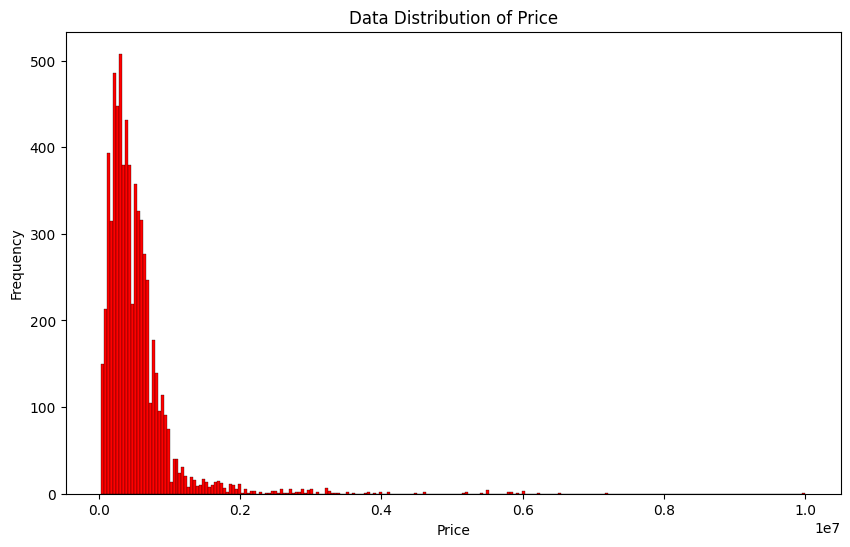

In [ ]:
# Plot histogram to know data distribution of price column and data is longtail
plt.figure(figsize=(10, 6))

sns.histplot(df.price, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Data Distribution of Price')

plt.show()

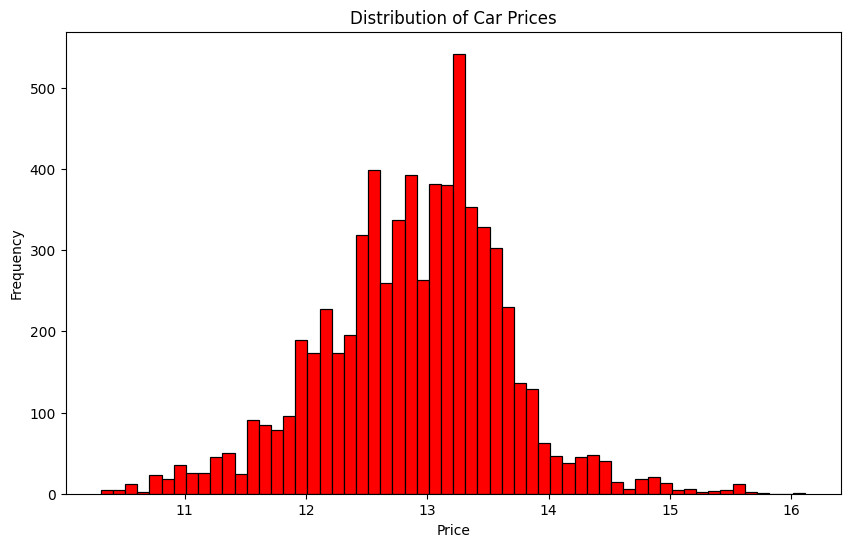

In [ ]:
# log the data for price colum
import numpy as np
df['price_log'] = np.log1p(df['price'])
plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'], color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of Car Prices')
plt.show()


In [ ]:
# convert power column from object to numeric data type
df['power'] = pd.to_numeric(df['power'], errors='coerce')
df.dtypes
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

,0
name,0
year,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0
power,0


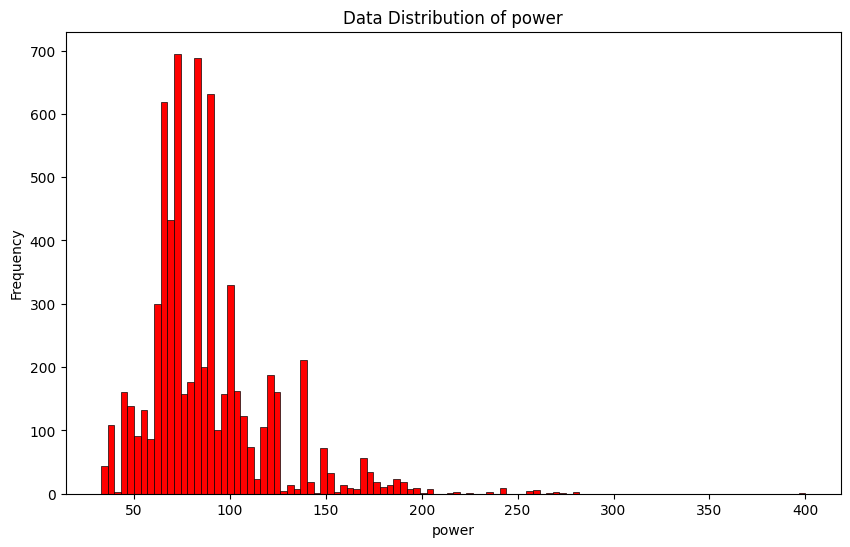

In [ ]:
# Plot histogram to know data distribution of power column
plt.figure(figsize=(10, 6))

sns.histplot(df.power, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('power')
plt.title('Data Distribution of power')

plt.show()

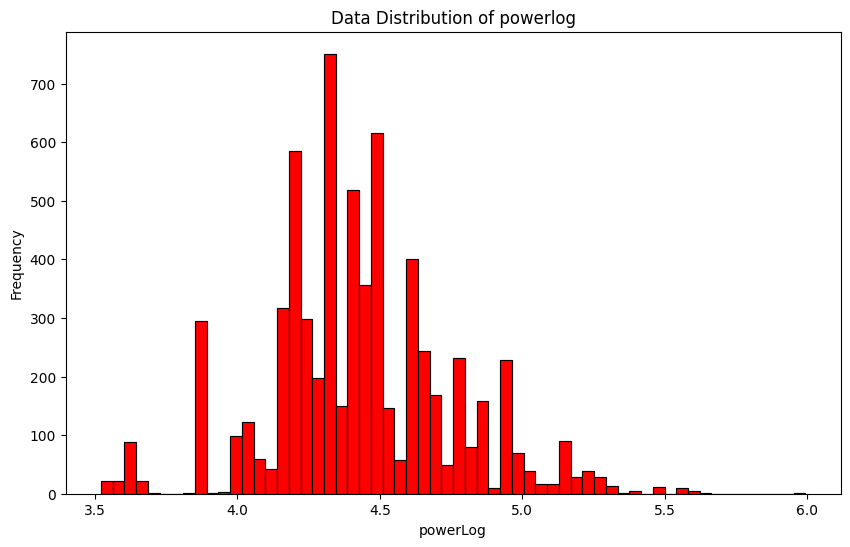

In [ ]:
# log the power column
df['power_log'] = np.log1p(df['power'])
df.head()
plt.figure(figsize=(10, 6))

sns.histplot(df.power_log, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('powerLog')
plt.title('Data Distribution of powerlog')

plt.show()

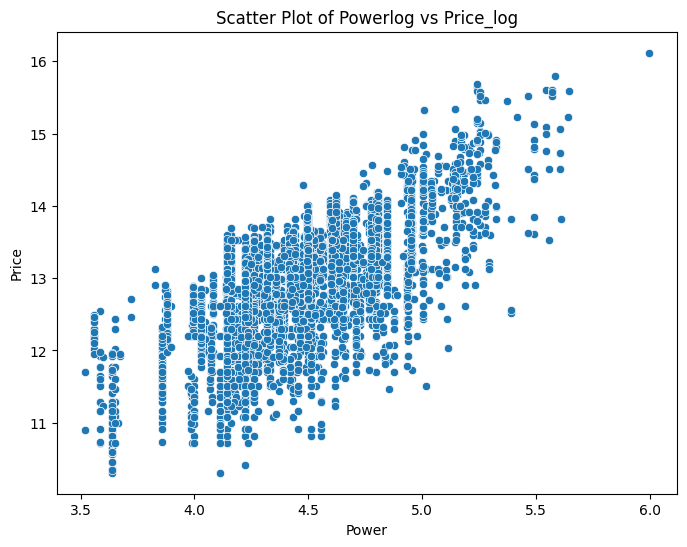

In [ ]:
#Scatter plot for powerlog and price column
plt.figure(figsize=(8, 6))
sns.scatterplot(x='power_log', y='price_log', data=df)

plt.xlabel('Power')
plt.ylabel('Price')
plt.title('Scatter Plot of Powerlog vs Price_log')

plt.show()

<Figure size 1000x600 with 0 Axes>

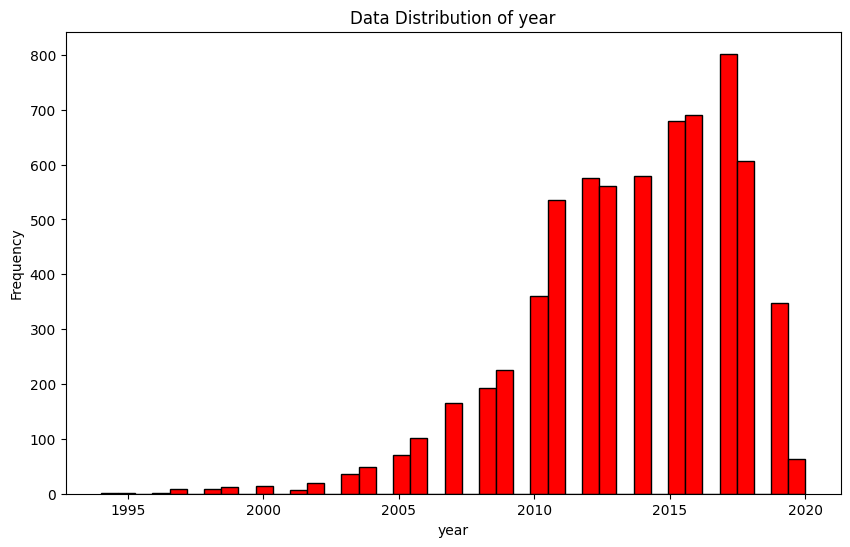

In [ ]:
#Plot histogram to know data distribution of year column
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

sns.histplot(df.year, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('year')
plt.title('Data Distribution of year')

plt.show()

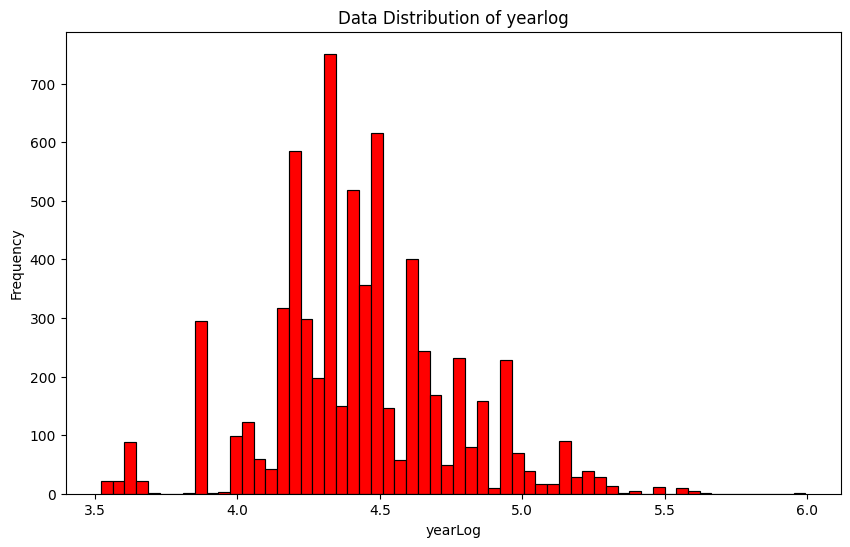

In [ ]:
# log year column
df['year_log'] = np.log1p(df['year'])
df.head()
plt.figure(figsize=(10, 6))

sns.histplot(df.power_log, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('yearLog')
plt.title('Data Distribution of yearlog')

plt.show()

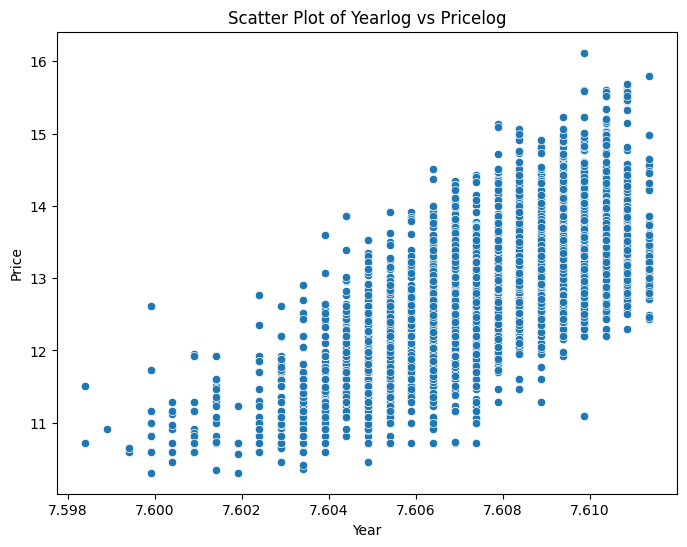

In [ ]:
#Scatterplot for Yearlog and Price log
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year_log', y='price_log', data=df)

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Yearlog vs Pricelog')

plt.show()

In [ ]:
df.describe()

,year,km_driven,mileage,engine,power,seats,price,price_log,power_log,year_log
count,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000
mean,2013.611136,7.339834e+04,19.466585,1430.985857,87.766100,5.434271,5.263860e+05,12.889660,4.431011,7.608180
std,3.897402,5.870328e+04,4.048102,493.469198,31.724555,0.983805,5.235504e+05,0.750377,0.325716,0.001936
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.999900e+04,10.308953,3.520461,7.598399
25%,2011.000000,3.800000e+04,16.800000,1197.000000,67.100000,5.000000,2.500000e+05,12.429220,4.220977,7.606885
50%,2014.000000,6.820300e+04,19.440000,1248.000000,81.830000,5.000000,4.200000e+05,12.948012,4.416790,7.608374
75%,2017.000000,1.000000e+05,22.500000,1498.000000,100.000000,5.000000,6.500000e+05,13.384729,4.615121,7.609862
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07,16.118096,5.993961,7.611348


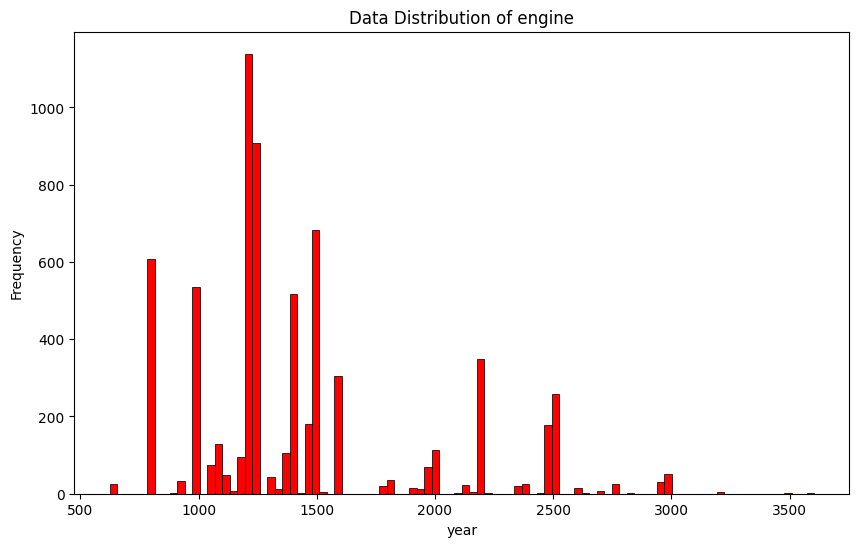

In [ ]:
#Plot histogram to know data distribution of engine column
plt.figure(figsize=(10, 6))

sns.histplot(df.engine, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('year')
plt.title('Data Distribution of engine')

plt.show()

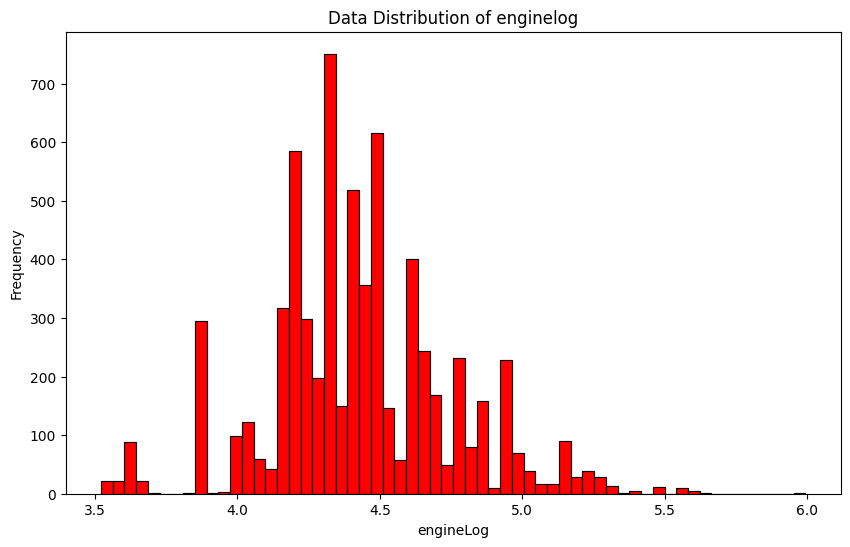

In [ ]:
# log engine column
df['engine_log'] = np.log1p(df['engine'])
df.head()
plt.figure(figsize=(10, 6))

sns.histplot(df.power_log, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('engineLog')
plt.title('Data Distribution of enginelog')

plt.show()

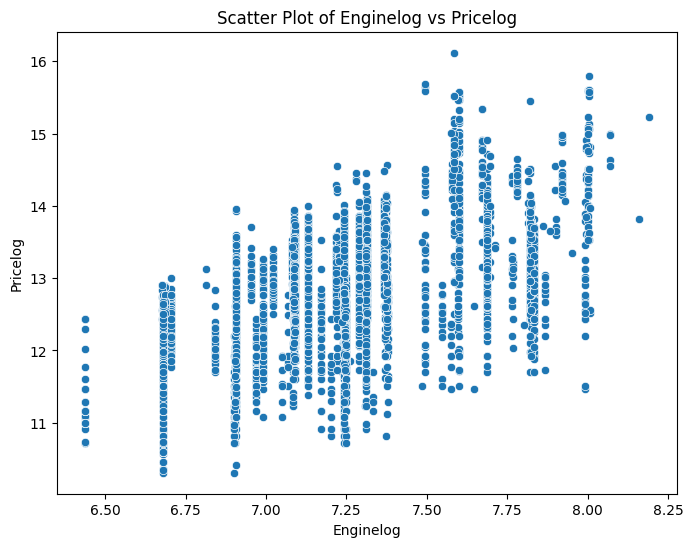

In [ ]:
#Scatterplot for engine log and pricelog
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_log', y='price_log', data=df)

plt.xlabel('Enginelog')
plt.ylabel('Pricelog')
plt.title('Scatter Plot of Enginelog vs Pricelog')

plt.show()

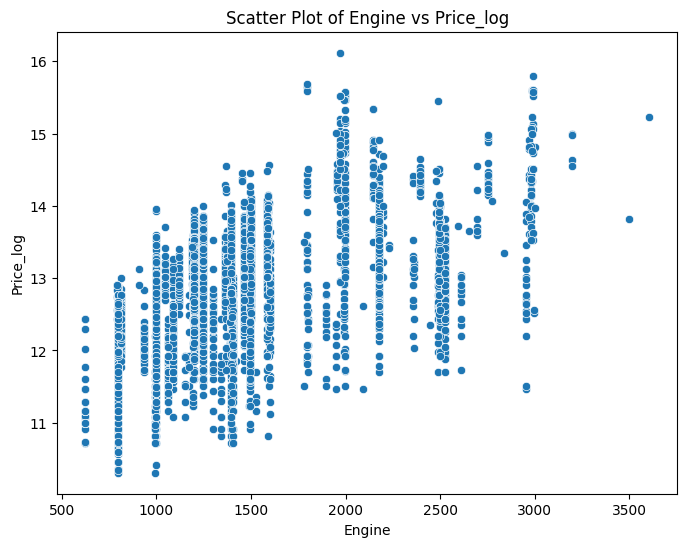

In [ ]:
#Scatterplot for engine and pricelog
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine', y='price_log', data=df)

plt.xlabel('Engine')
plt.ylabel('Price_log')
plt.title('Scatter Plot of Engine vs Price_log')

plt.show()

In [ ]:
#Replace fuel column with numerical data
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
df['fuel'].value_counts()

<ipython-input-83-ec0079c6879a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)


,count
fuel,
0,3658
1,2973
2,51
3,35


In [ ]:
#Replace seller_type column with numerical data
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2,}},inplace=True)
df['seller_type'].value_counts()

<ipython-input-84-6b05cc8c0649>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2,}},inplace=True)


,count
seller_type,
0,6024
1,666
2,27


In [ ]:
#Replace transmission column with numerical data
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
df['transmission'].value_counts()

<ipython-input-85-625a59df193d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)


,count
transmission,
0,6142
1,575


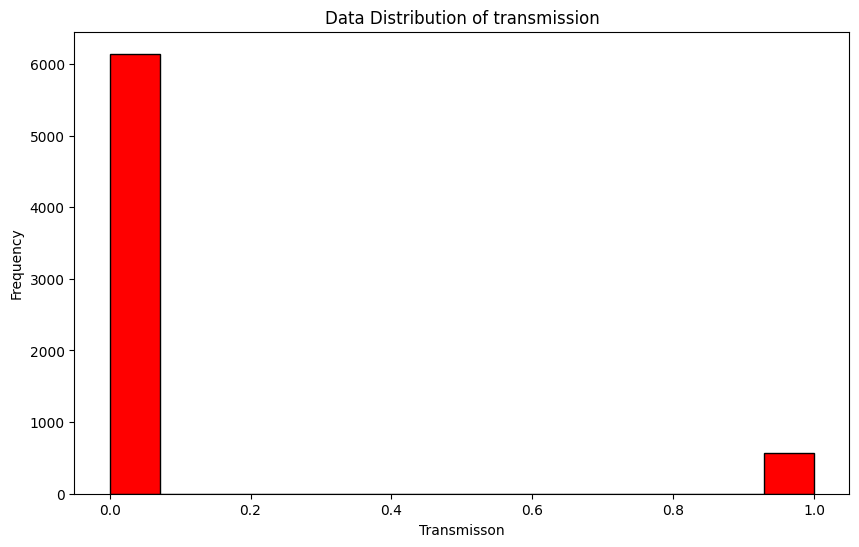

In [ ]:
#Plot histogram to know data distribution of transmission column
plt.figure(figsize=(10, 6))

sns.histplot(df.transmission, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Transmisson')
plt.title('Data Distribution of transmission')

plt.show()

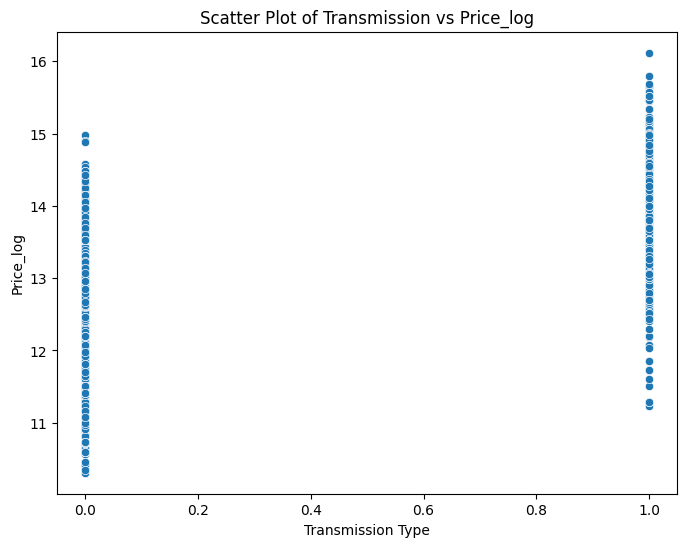

In [ ]:
#Scatterplot for transmission and pricelog
plt.figure(figsize=(8, 6))
sns.scatterplot(x='transmission', y='price_log', data=df)

plt.xlabel('Transmission Type')
plt.ylabel('Price_log')
plt.title('Scatter Plot of Transmission vs Price_log')

plt.show()

In [ ]:
#Replace owner column with numerical data
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
df['owner'].value_counts()

<ipython-input-88-ce29d13bb22f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


,count
owner,
0,4176
1,1888
2,493
3,155
4,5


In [ ]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,price,price_log,power_log,year_log,engine_log
0,Maruti Swift Dzire VDI,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0,450000,13.017005,4.317488,7.608374,7.130099
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0,370000,12.821261,4.649378,7.608374,7.312553
2,Honda City 2017-2020 EXi,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0,158000,11.970357,4.369448,7.604396,7.311886
3,Hyundai i20 Sportz Diesel,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0,225000,12.323860,4.510860,7.606387,7.242082
4,Maruti Swift VXI BSIII,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0,130000,11.775297,4.490881,7.604894,7.169350


In [ ]:
# install category Encoders and encode car name according to the price log
!pip install category_encoders
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['name'])
df['name_encoded'] = encoder.fit_transform(df['name'], df['price_log'])


In [ ]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,price,price_log,power_log,year_log,engine_log,name_encoded
0,Maruti Swift Dzire VDI,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0,450000,13.017005,4.317488,7.608374,7.130099,13.248272
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0,370000,12.821261,4.649378,7.608374,7.312553,12.933051
2,Honda City 2017-2020 EXi,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0,158000,11.970357,4.369448,7.604396,7.311886,12.696337
3,Hyundai i20 Sportz Diesel,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0,225000,12.323860,4.510860,7.606387,7.242082,12.816045
4,Maruti Swift VXI BSIII,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0,130000,11.775297,4.490881,7.604894,7.169350,12.750613


In [ ]:
# Move price_log column to the last
price_log_column = df.pop('price_log')
df['price_log'] = price_log_column
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,price,power_log,year_log,engine_log,name_encoded,price_log
0,Maruti Swift Dzire VDI,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0,450000,4.317488,7.608374,7.130099,13.248272,13.017005
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0,370000,4.649378,7.608374,7.312553,12.933051,12.821261
2,Honda City 2017-2020 EXi,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0,158000,4.369448,7.604396,7.311886,12.696337,11.970357
3,Hyundai i20 Sportz Diesel,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0,225000,4.510860,7.606387,7.242082,12.816045,12.323860
4,Maruti Swift VXI BSIII,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0,130000,4.490881,7.604894,7.169350,12.750613,11.775297


In [ ]:
# drop name column from the dataset
df.drop('name', axis=1, inplace=True)
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,price,power_log,year_log,engine_log,name_encoded,price_log
0,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0,450000,4.317488,7.608374,7.130099,13.248272,13.017005
1,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0,370000,4.649378,7.608374,7.312553,12.933051,12.821261
2,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0,158000,4.369448,7.604396,7.311886,12.696337,11.970357
3,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0,225000,4.510860,7.606387,7.242082,12.816045,12.323860
4,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0,130000,4.490881,7.604894,7.169350,12.750613,11.775297


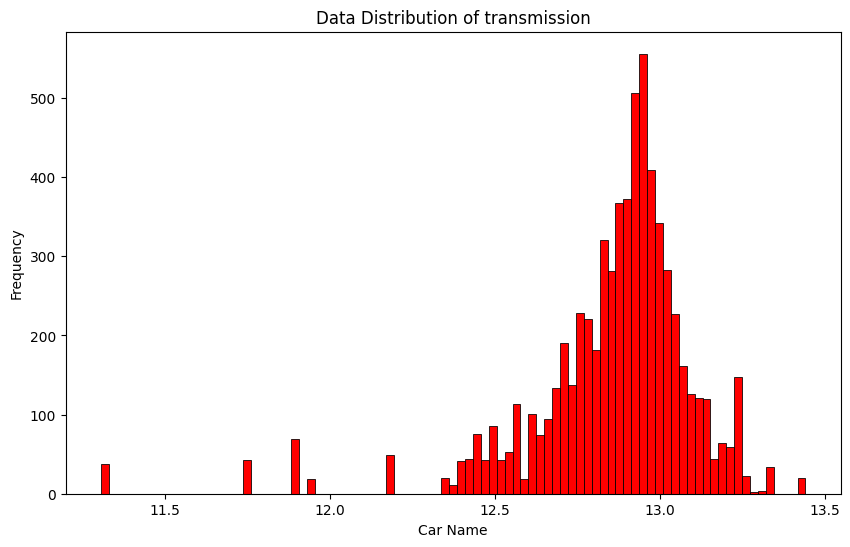

In [ ]:
# histogram for name encoded column
plt.figure(figsize=(10, 6))

sns.histplot(df.name_encoded, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Car Name')
plt.title('Data Distribution of transmission')

plt.show()

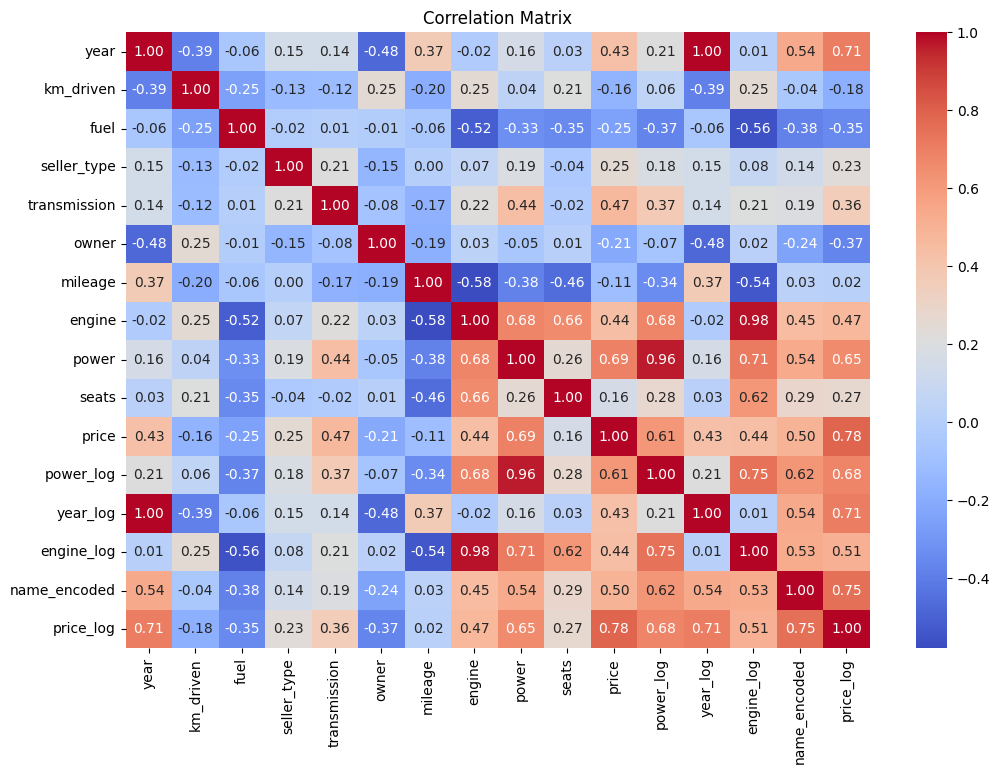

In [ ]:
# correlation matrix for the dataset
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# split x, y and choose x columns according to correlation matrix
x = df[['name_encoded','engine_log','year_log','power_log','seats','mileage','transmission','seller_type']]
y = df['price_log']
x.head()


,name_encoded,engine_log,year_log,power_log,seats,mileage,transmission,seller_type
0,13.248272,7.130099,7.608374,4.317488,5.0,23.40,0,0
1,12.933051,7.312553,7.608374,4.649378,5.0,21.14,0,0
2,12.696337,7.311886,7.604396,4.369448,5.0,17.70,0,0
3,12.816045,7.242082,7.606387,4.510860,5.0,23.00,0,0
4,12.750613,7.169350,7.604894,4.490881,5.0,16.10,0,0


In [ ]:
y.head()

,price_log
0,13.017005
1,12.821261
2,11.970357
3,12.323860
4,11.775297


# Train/Test Split

In [ ]:
# import train test split. use 80 percent of data to train and 20 percent for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# import strandard scaler to fit the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Linear Regression

In [ ]:
# By using liner Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score # Import the necessary functions

# Initialize the model
reg_model = LinearRegression()

# Train the model
reg_model.fit(x_train, y_train)

# Predict
y_pred = reg_model.predict(x_test)

# Evaluate

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.09612684763633629
R^2 Score: 0.8249112025367515


# Decision Tree

In [ ]:
# By using decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

# Predict using the trained model
tree_y_pred = tree_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, tree_y_pred))
print("R^2 Score:", r2_score(y_test, tree_y_pred))

Mean Squared Error: 0.05325966005565271
R^2 Score: 0.9029909951096671


# Random Forest

In [ ]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split =2, min_samples_leaf=1, max_depth=None, random_state=42)
rf_model.fit(x_train, y_train)

# Predict using the trained model
for_y_pred = rf_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, for_y_pred))
print("R^2 Score:", r2_score(y_test, for_y_pred))

Mean Squared Error: 0.03904645275505992
R^2 Score: 0.9288794272755833


## Optimization with GA

In [ ]:
!pip install deap

In [ ]:
from deap import base, creator, tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random

# Define the fitness function
def fitness(individual):
    # Validate individual length
    if len(individual) != 10:
        return float("inf"),  # Penalize invalid individuals

    # Decode the individual (expanded binary representation)
    n_estimators = int("".join(map(str, individual[0:3])), 2) * 10 + 50  # 3 bits for finer granularity
    max_depth = int("".join(map(str, individual[3:6])), 2) * 5 + 10      # 3 bits for max depth
    min_samples_split = int("".join(map(str, individual[6:8])), 2) * 2 + 2  # 2 bits
    min_samples_leaf = int("".join(map(str, individual[8:10])), 2) + 1      # 2 bits

    # Train the Random Forest model with these hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    rf_model.fit(x_train, y_train)

    # Predict on the test set and calculate the MSE
    y_pred = rf_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)

    # Return MSE as the fitness (we want to minimize it)
    return mse,

# Create the problem (Minimization of MSE)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create the population (binary individuals)
def create_individual():
    return [random.randint(0, 1) for _ in range(10)]  # 10 bits for the 4 hyperparameters

# Setup the evolutionary algorithm
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness)

# Validate mating and mutation to enforce individual length
def validate_individual(individual):
    if len(individual) != 10:
        raise ValueError(f"Invalid individual length: {len(individual)}, expected 10 bits.")
    return individual

# Create the population
population = toolbox.population(n=50)

# Validate population
for ind in population:
    if len(ind) != 10:
        print(f"Invalid individual: {ind}")

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, verbose=True)

# Best solution
best_individual = tools.selBest(population, 1)[0]
print("Best individual:", best_individual)

# Decode the best individual
best_n_estimators = int("".join(map(str, best_individual[0:3])), 2) * 10 + 50
best_max_depth = int("".join(map(str, best_individual[3:6])), 2) * 5 + 10
best_min_samples_split = int("".join(map(str, best_individual[6:8])), 2) * 2 + 2
best_min_samples_leaf = int("".join(map(str, best_individual[8:10])), 2) + 1

print(f"Best Hyperparameters: \n n_estimators: {best_n_estimators} \n max_depth: {best_max_depth} \n min_samples_split: {best_min_samples_split} \n min_samples_leaf: {best_min_samples_leaf}")


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	32    
2  	33    
3  	35    
4  	43    
5  	38    
6  	34    
7  	32    
8  	39    
9  	45    
10 	41    
11 	40    
12 	41    
13 	40    
14 	36    
15 	33    
16 	43    
17 	25    
18 	41    
19 	37    
20 	42    
Best individual: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
Best Hyperparameters: 
 n_estimators: 100 
 max_depth: 10 
 min_samples_split: 4 
 min_samples_leaf: 2


In [ ]:
best_rf_model = RandomForestRegressor(
    n_estimators= best_n_estimators,
    max_depth= best_max_depth,
    min_samples_split= best_min_samples_split,
    min_samples_leaf= best_min_samples_split,
    random_state=42
)
best_rf_model.fit(x_train, y_train)

# Evaluate the best model
y_pred_best = best_rf_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best))
print("R^2 Score:", r2_score(y_test, y_pred_best))

Mean Squared Error: 0.037680213784469424
R^2 Score: 0.9313679426517776


<Axes: xlabel='price_log', ylabel='Count'>

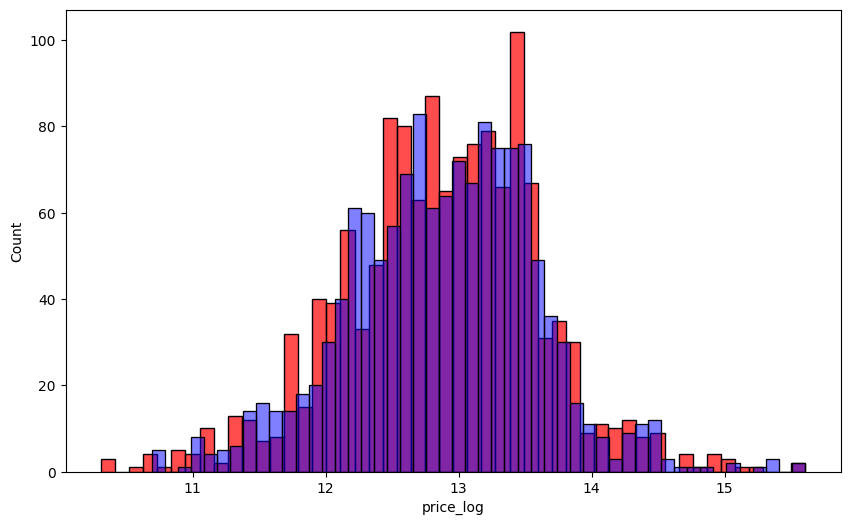

In [ ]:
# histogram for y test y prediction using Rrandom forest
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='red', alpha=0.7, bins=50)
sns.histplot(y_pred_best, color='blue', alpha=0.5, bins=50)

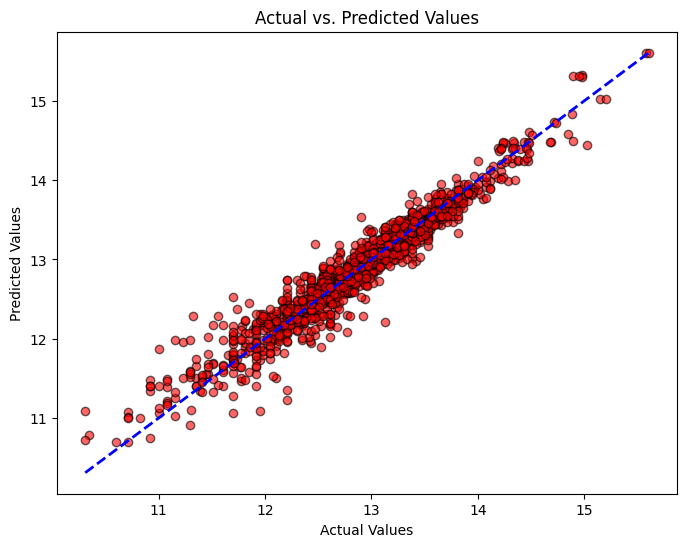

In [ ]:
# visualizing the relationship between actual and predicted values using random Forest
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='red', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()